## Statistical Inference Using Linear Regression

### Checking Assumptions

If linear regression is used for statistical inference, in addition to the coefficients of the linear model, several statistical indicators (e.g. p-values, BIC, ...) are also calculated. When calculating these indicators, certain assumptions are made – and these need to hold if the results are to be valid. Therefore, before any conclusions are drawn, it is necessary to check whether the problem being solved meets these assumptions.

Specifically, the following assumptions are made [[islr](#islr),[duke](#duke)]:

# **Linearity:**  there is a linear relationship between the predictors and the predicted variable;


# **No multicollinearity:**  the predictors are not too strongly correlated with each other;


# **Independence of residuals:**  the residuals (prediction errors) on individual samples are statistically independent (there is no dependence, for example, between the residuals of the subsequent values in a time series, etc.);


# **Homoscedasticity of residuals:**  the variance of the residuals is constant, i.e. it does not depend on any of the predictors, on time, etc.;


# **Normality of residuals:**  the residuals are normally distributed and their mean is to be at zero;


### 1. Linearity

Linearity is typically checked using graphical visualization of the relationships. We are going to be using smoothed scatter plots (smoothing based on the lowess method) in this notebook. We are also going to fit a line through the points to make comparisons easier. This will help us assess whether any relationship is too non-linear or not. A plot with a **clearly linear relationship**  might look like this:

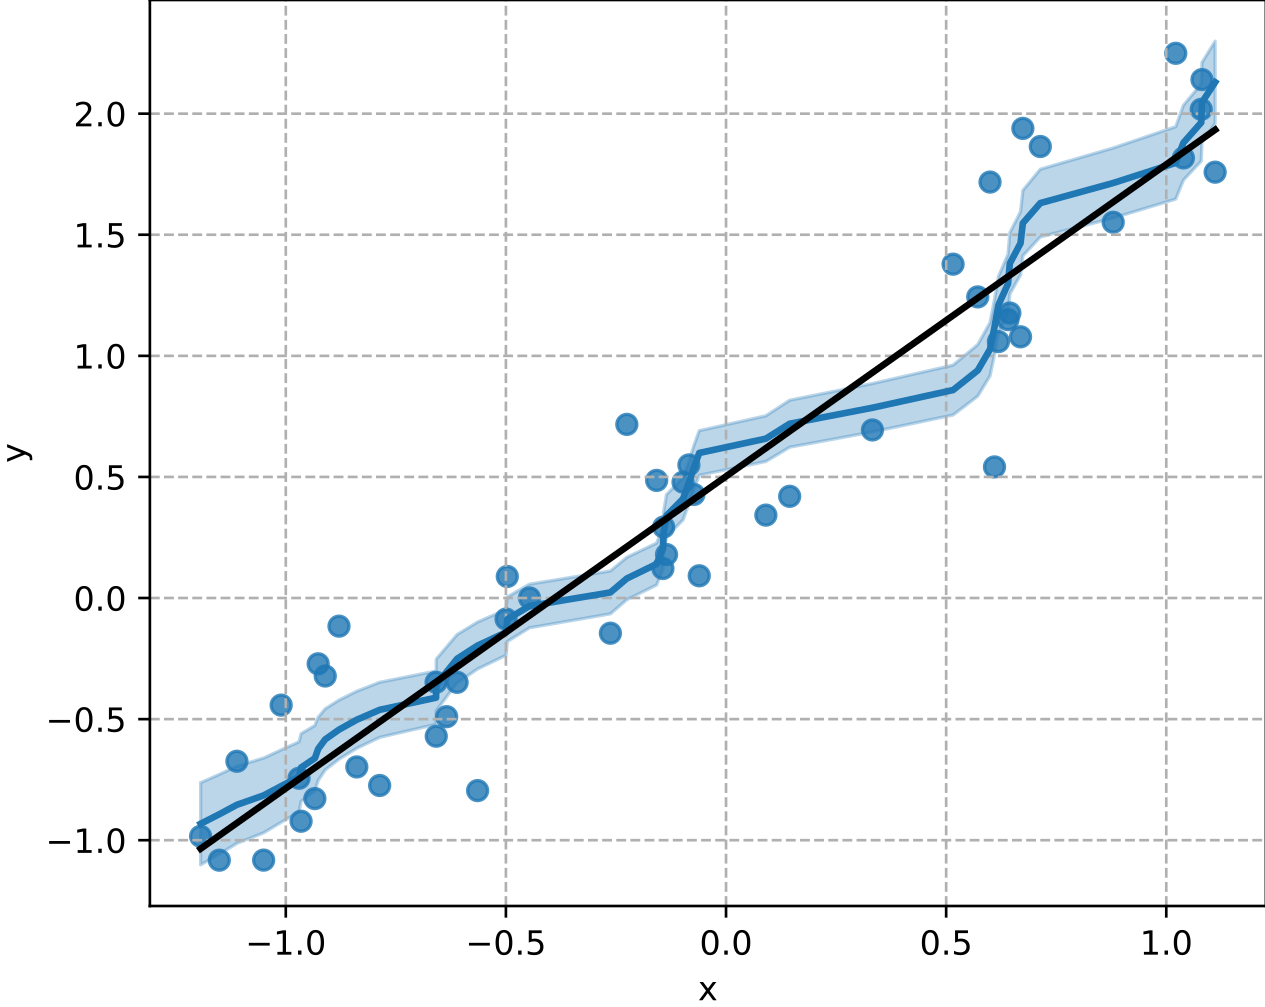

As you can see, the smoothing curve is not quite linear – it is actually rather wiggly. However, with noise and not too much data, this is always going to be the case. The important thing is that the general trend is linear. For comparison, here is a plot with a **strongly non-linear relationship** :

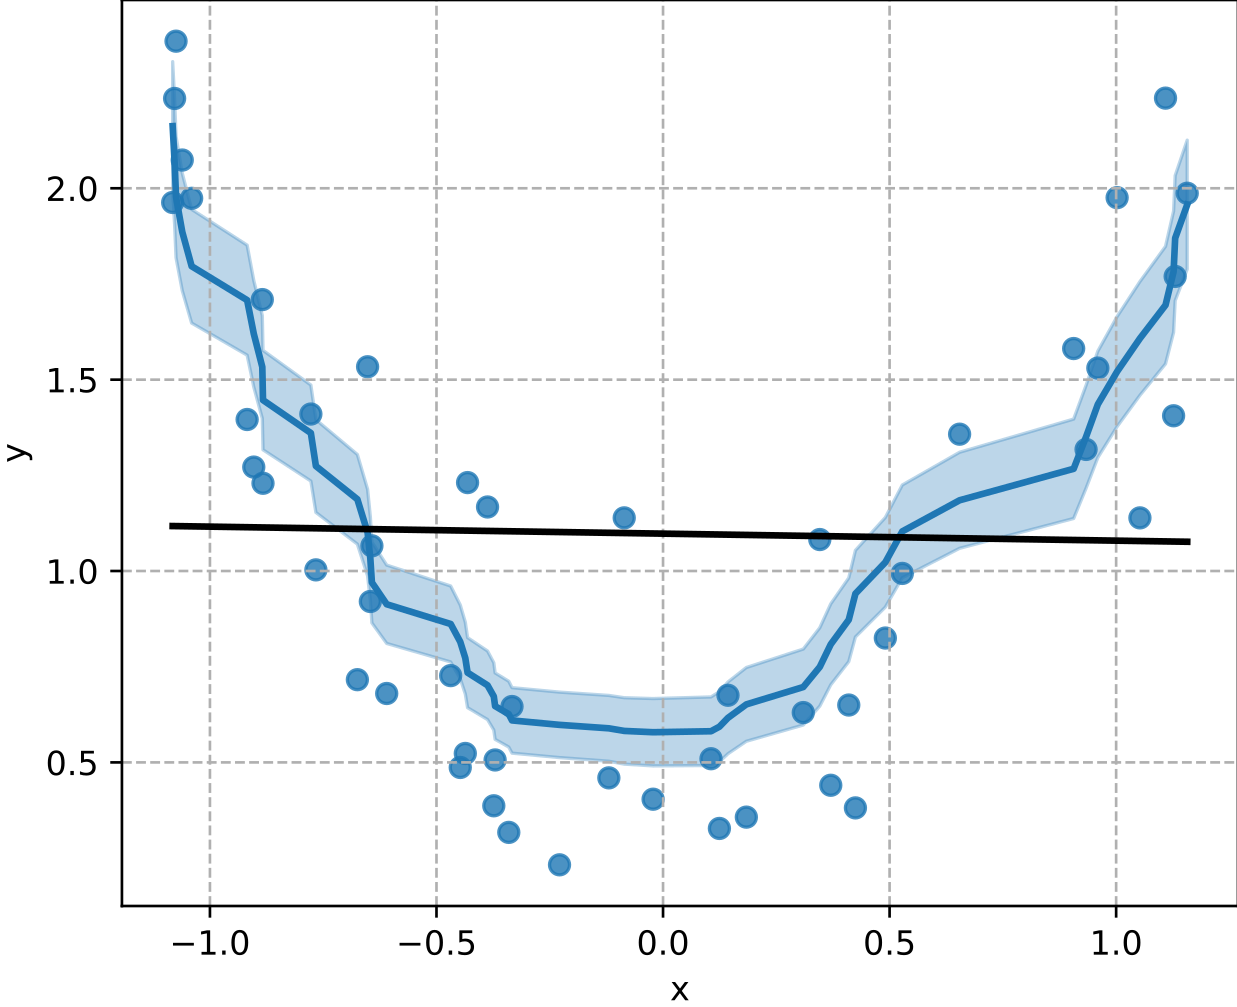



#### Handling Non-Linear Relationships

There are several ways to deal with strongly non-linear relationships between variables – the choice of an appropriate approach usually depends on why the relationship is non-linear. We can mention the following options [[duke](#duke)]:

* **Applying a non-linear transformation:**  We apply a non-linear transformation to the predictor (e.g. logarithm, power, exponential function, ...). Typically, this approach needs to be applied carefully – it is not okay to just apply any arbitrary non-linear transformation for the sake of it – the choice of the transformation must make sense in the context of the given relationship. Observed data can often be approximated satisfactorily by a polynomial of some higher degree, however such polynomial models typically have problems generalizing and are usually very bad at extrapolation (making predictions outside the observed range of data).


* **Adding an interaction with another predictor:**  It may be the case that the relationship appears non-linear because the predictor has an interaction with another predictor. This means that the effect of predictor $x_i$ on the response variable $y$ depends on the value of some other predictor $x_j$. Such interacting predictor may or may not be part of the data set – in some cases it may be necessary to collect its values separately. If we already have both predictors available, we can create a new predictor $x_k = x_i \cdot x_j$ to model the interaction.


#### Applying a Non-linear Transformation

Let us show an example of the first approach – applying a non-linear transformation. The data that we showed as an example of a strongly non-linear relationship were taken from a parabola ($x^2$). We can therefore linearize the relationship in this case by using $x$ raised to the power of two instead of the original $x$ as the input to our linear regressor. The result would look like this:

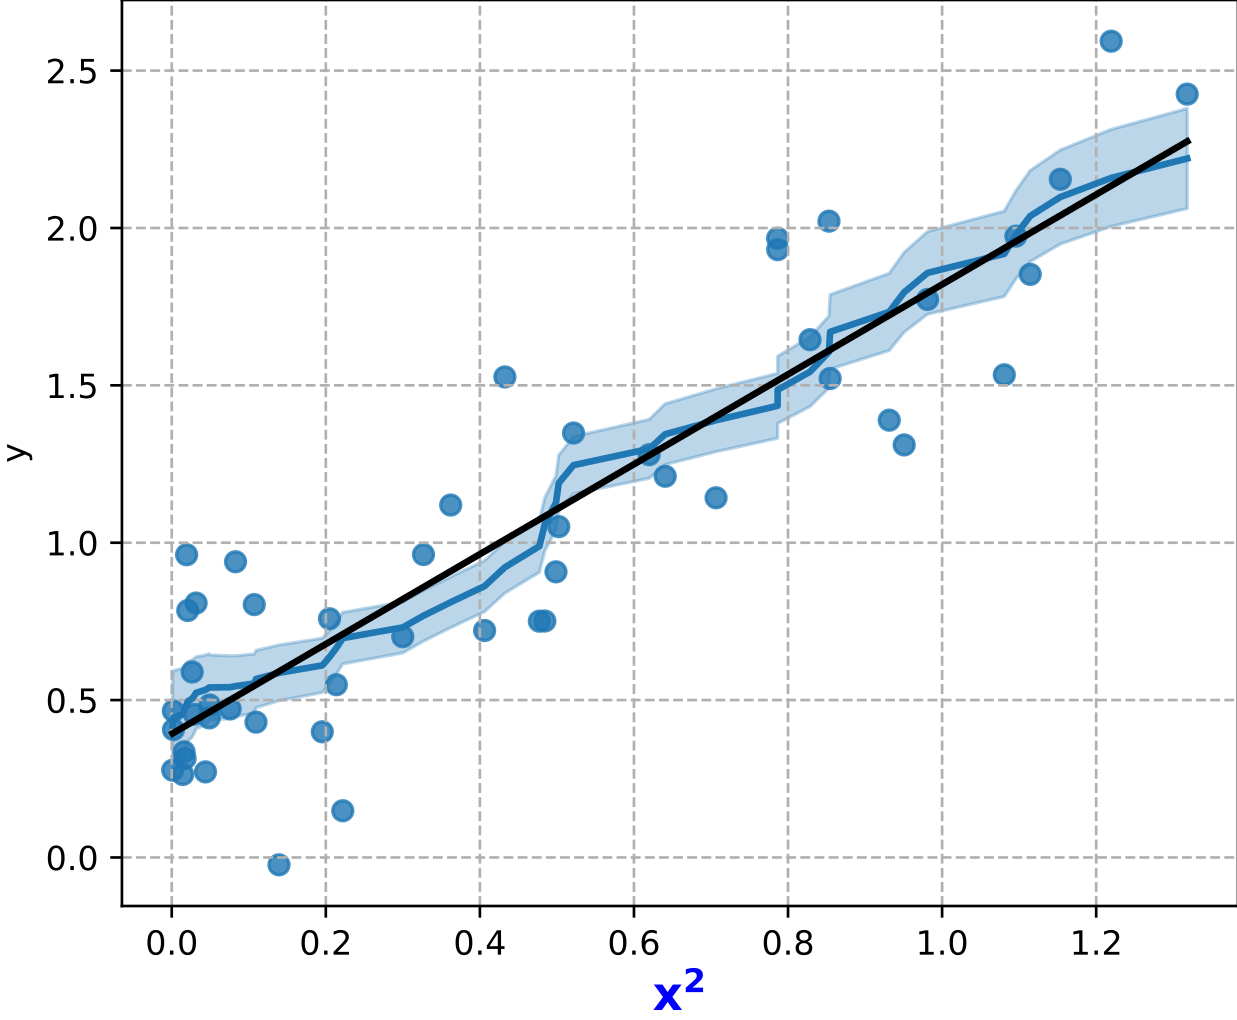



#### An Interaction with Another Predictor

As our second example, let's take a simple relationship between two variables $x$ and $y$:

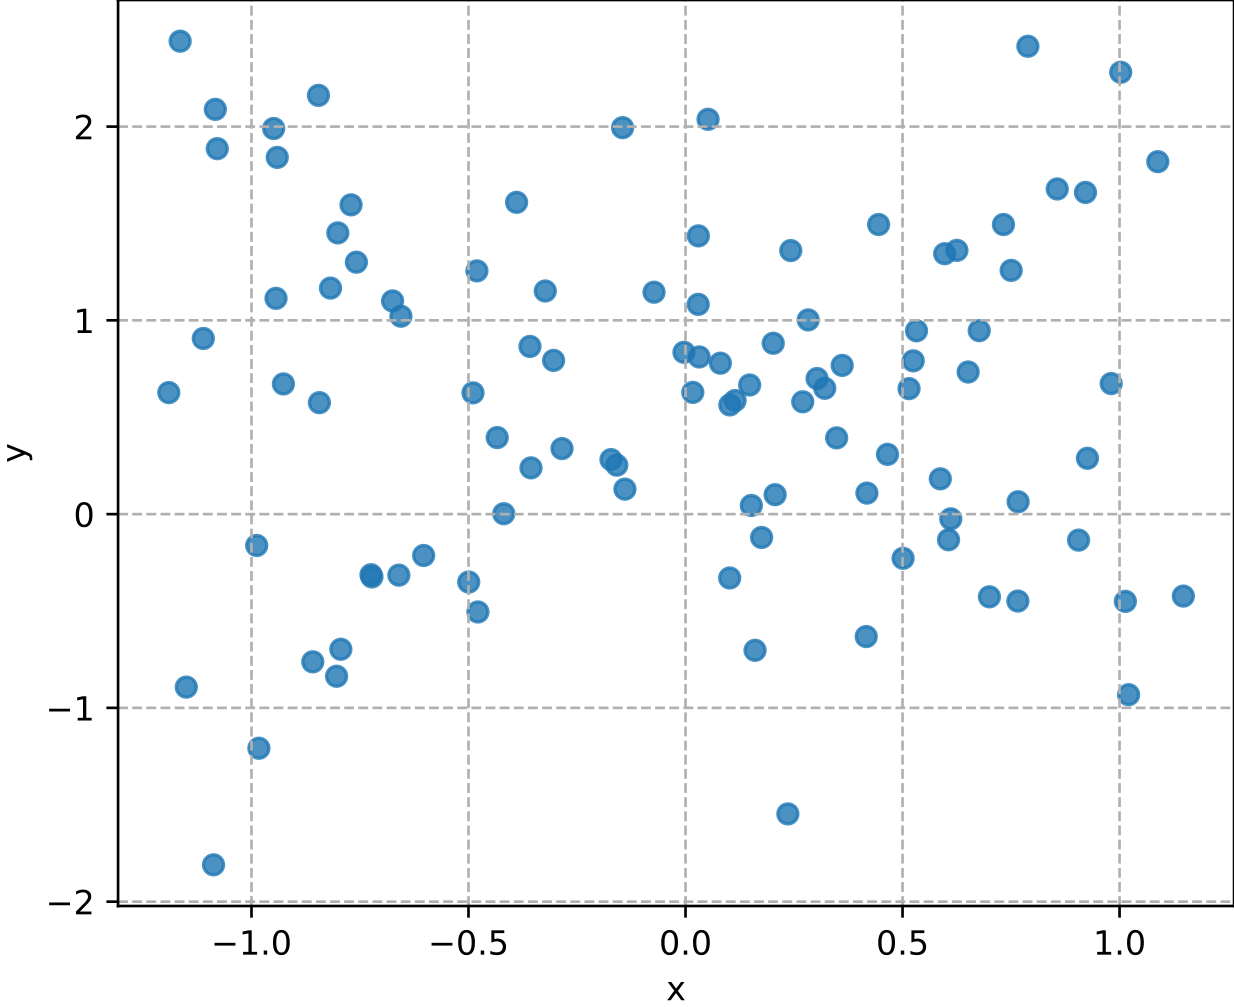
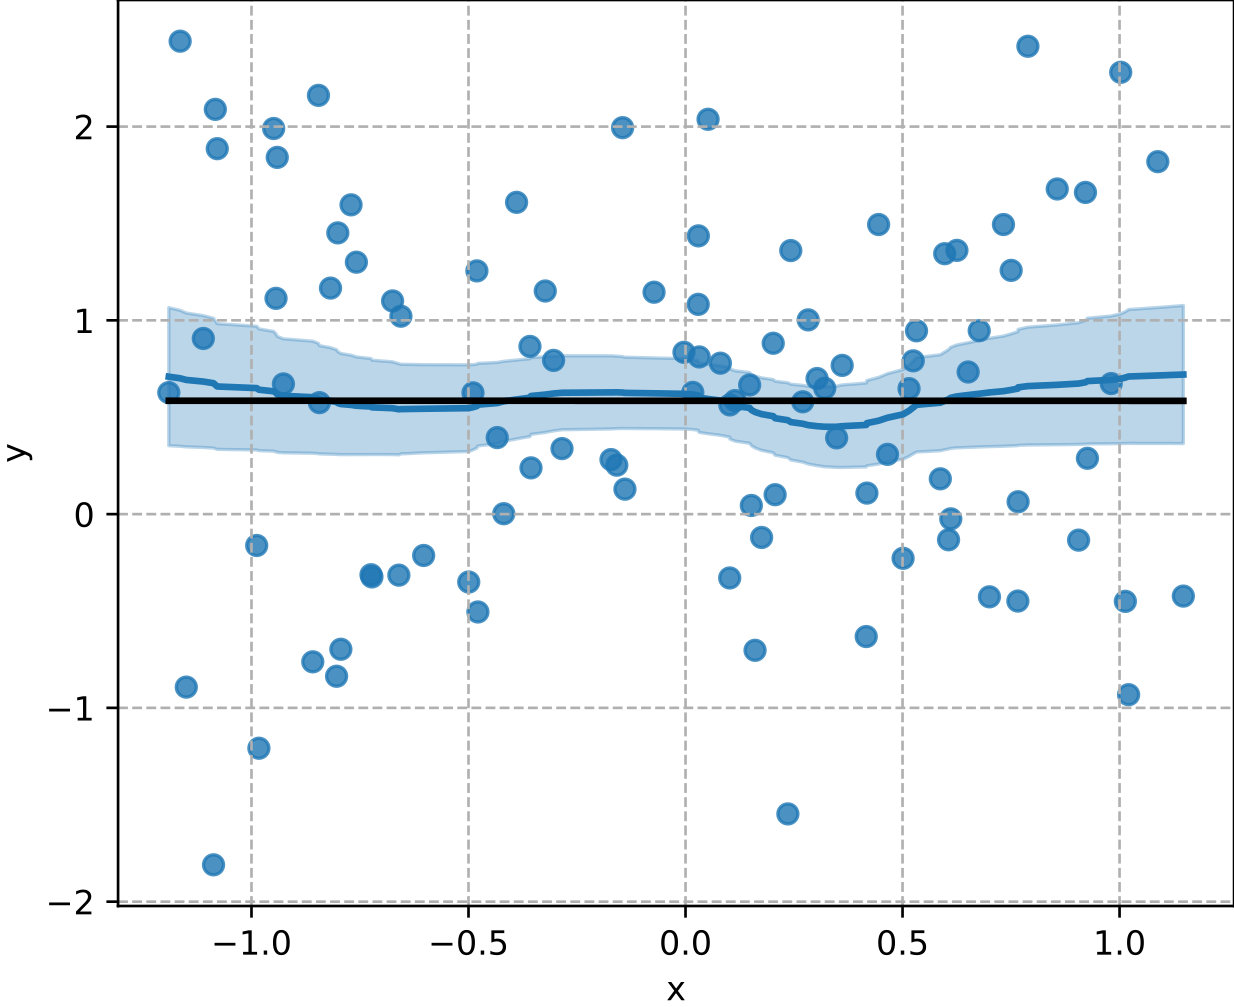

Given these plots, it doesn't look as if there could actually be any interesting relationship between $x$ and $y$ – let alone a strongly linear relationship. But what if we found out that this data represents certain observations about a group of people and that part of the group consists of men, while another part is made up by women.

If it turned out that the relationship between $x$ and $y$ is significantly different for men than it is for women, this would mean that there is an interaction between variables $x$ and "sex" (in relation to variable $y$). To further probe this idea, we could start by coloring the points in the plot according to sex: red colour will correspond to women and blue to men. Are the red and the blue points distributed uniformly or do you see any patterns in the plot?

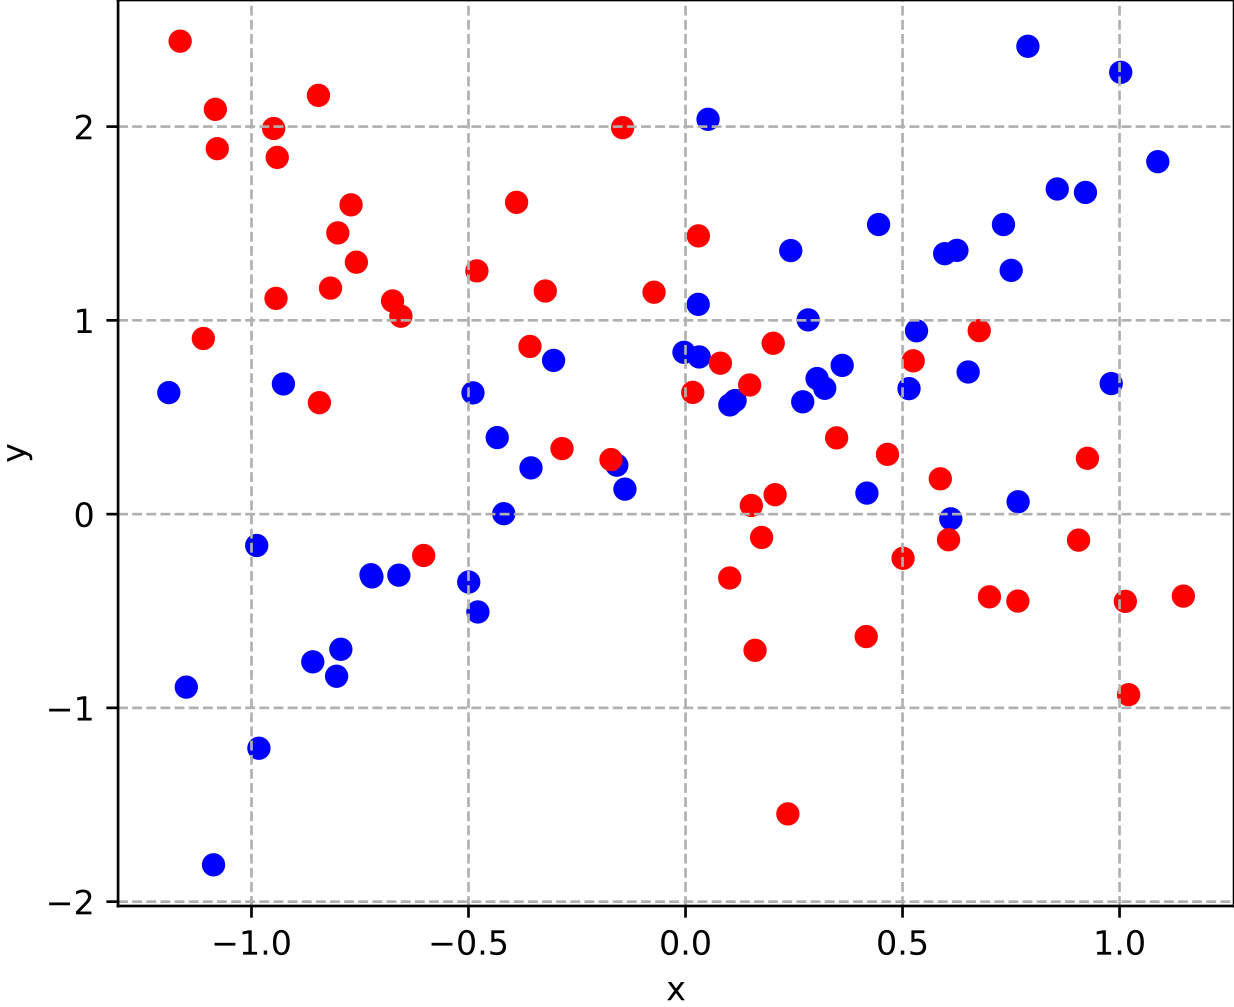

This plot makes it clear that the points, once split by sex, are definitely not distributed uniformly – there is a clear pattern. There certainly seems to be some interaction between variable $x$ and "sex". So what would our smoothed scatter look like if we plotted it for each sex separately:

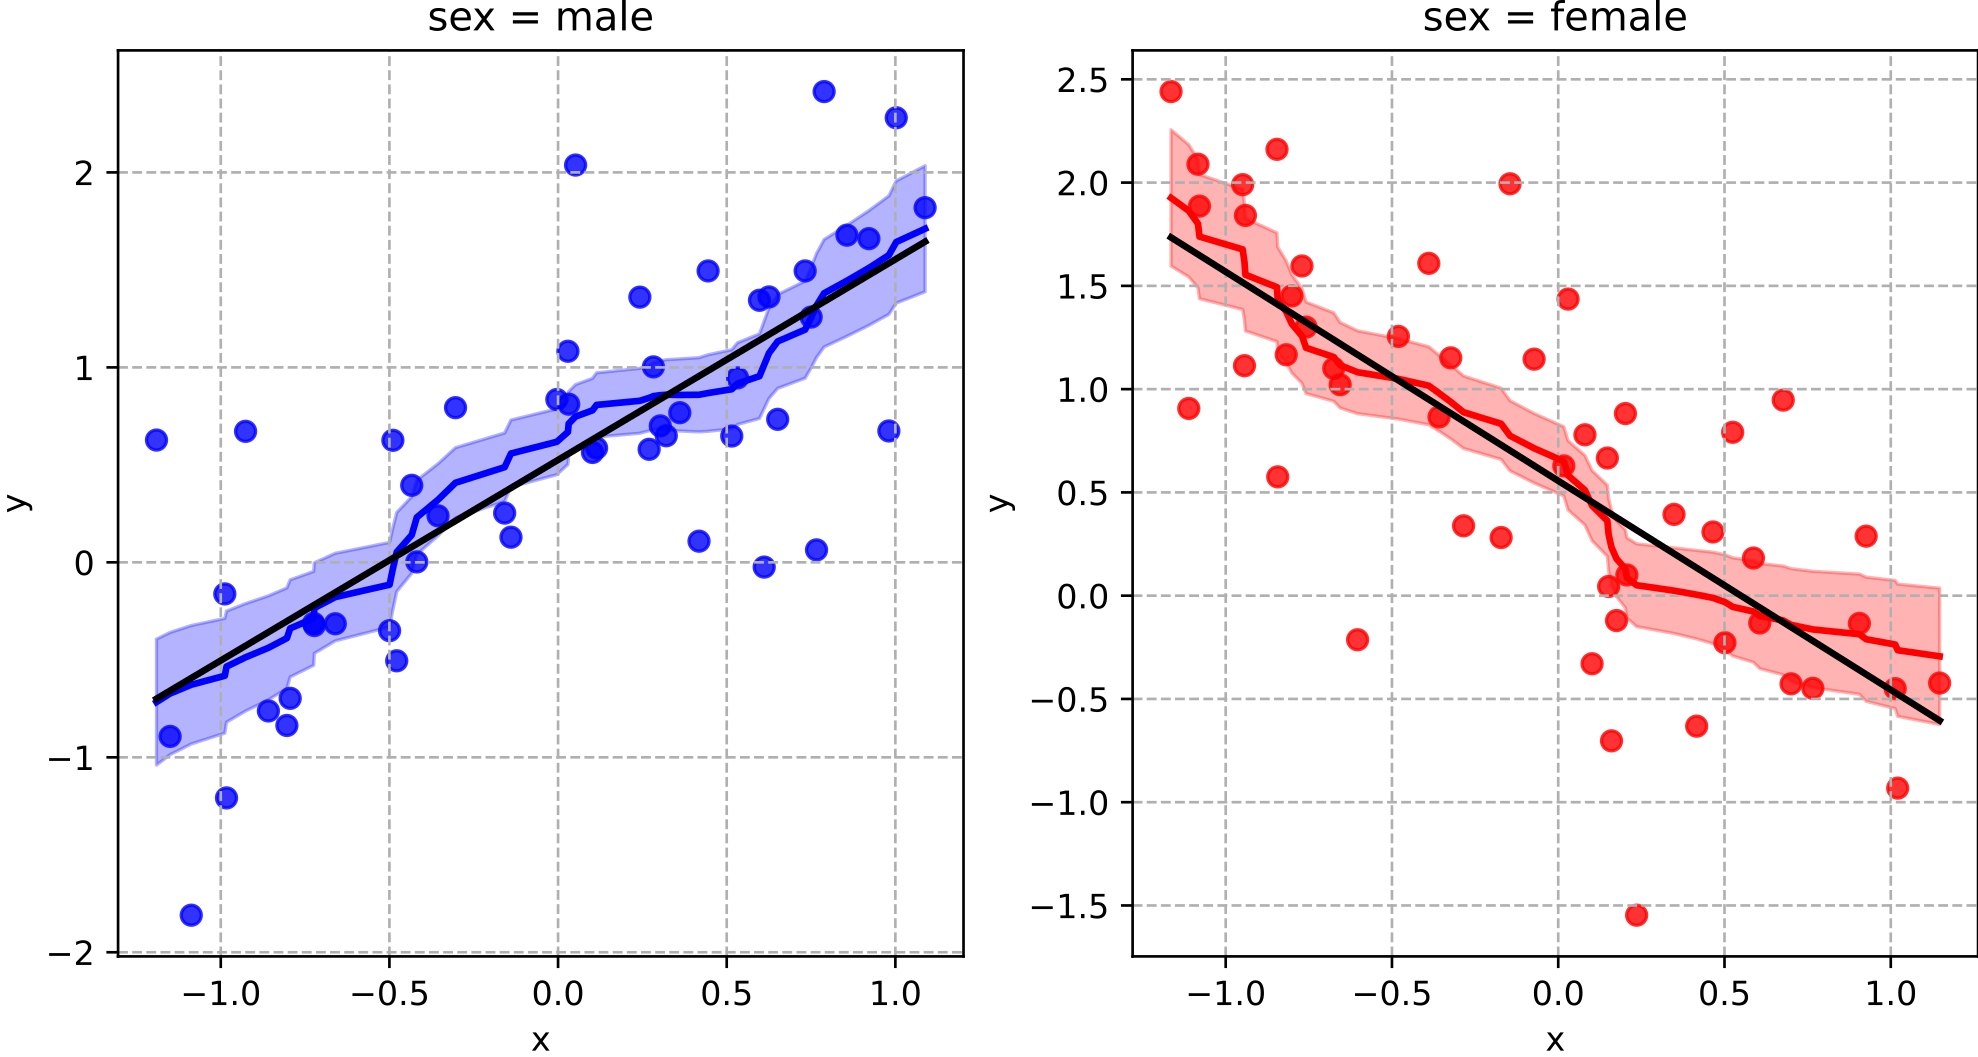

Well, it's official now: there is a very strong linear relationship between $x$ and $y$ – or rather between the interaction of $x$ with "sex" and $y$. We did not see it in our original plots precisely because we were not taking the relationship with sex into account, which disguised the linear relationship.

So how do we make sure that our linear regressor can model this relationship correctly? What we need to do is add interaction variables into our dataset as new columns. We could do this by encoding sex using one-hot encoding (i.e. creating binary columns sex=male and sex=female) and multiplying the resulting columns by $x$. That way, the linear model would have at its disposal the information that variable $x$ has a certain value *and at the same time*  the given individual is male or female.



### 2. No Multicollinearity

With the assumption of no multicollinearity (a.k.a. no collinearity), we are stipulating that the predictors must not be too strongly correlated with each other. This is important because if the predictors are strongly correlated, the linear model will not be able to distinguish the effect of each predictor on the response variable.

Suppose that your dataset contains two predictors $\mathbf{x}_1$ and $\mathbf{x}_2$ so that $\mathbf{x}_2$ is a perfect copy of $\mathbf{x}_1$, i.e. $\mathbf{x}_2 = \mathbf{x}_1$ (and their correlation is, of course, 1). Well, if the predictors are completely identical, then there is actually an infinite number of weight combinations that are going to be functionally equivalent. You could choose to completely ignore $\mathbf{x}_1$ and go only with $\mathbf{x}_2$, or decide to go with $\mathbf{x}_1$ and ignore $\mathbf{x}_2$, or anything in between.

It is obvious then, that even when the predictors are not completely identical, but just very, very similar, tiny changes to the dataset are going to have a huge effect on which looks better to ordinary least squares. This is going to make their weights very volatile.

#### Checking for Multicollinearity

Naturally, it is relatively easy to check for multicollinearity – what we need to do is look at the correlation matrix. If the correlation between two predictors is close to 1 (or -1, of course), then we have a problem and one of the predictors will need to be removed from the dataset.

An example of a correlation matrix for the Titanic dataset is shown below. In this case, there is no problem with multicollinearity – no correlations are even close to 1. Note that variable "Survived" is the response variable in this case, so we are not looking at correlations with it when looking for multicollinearity.

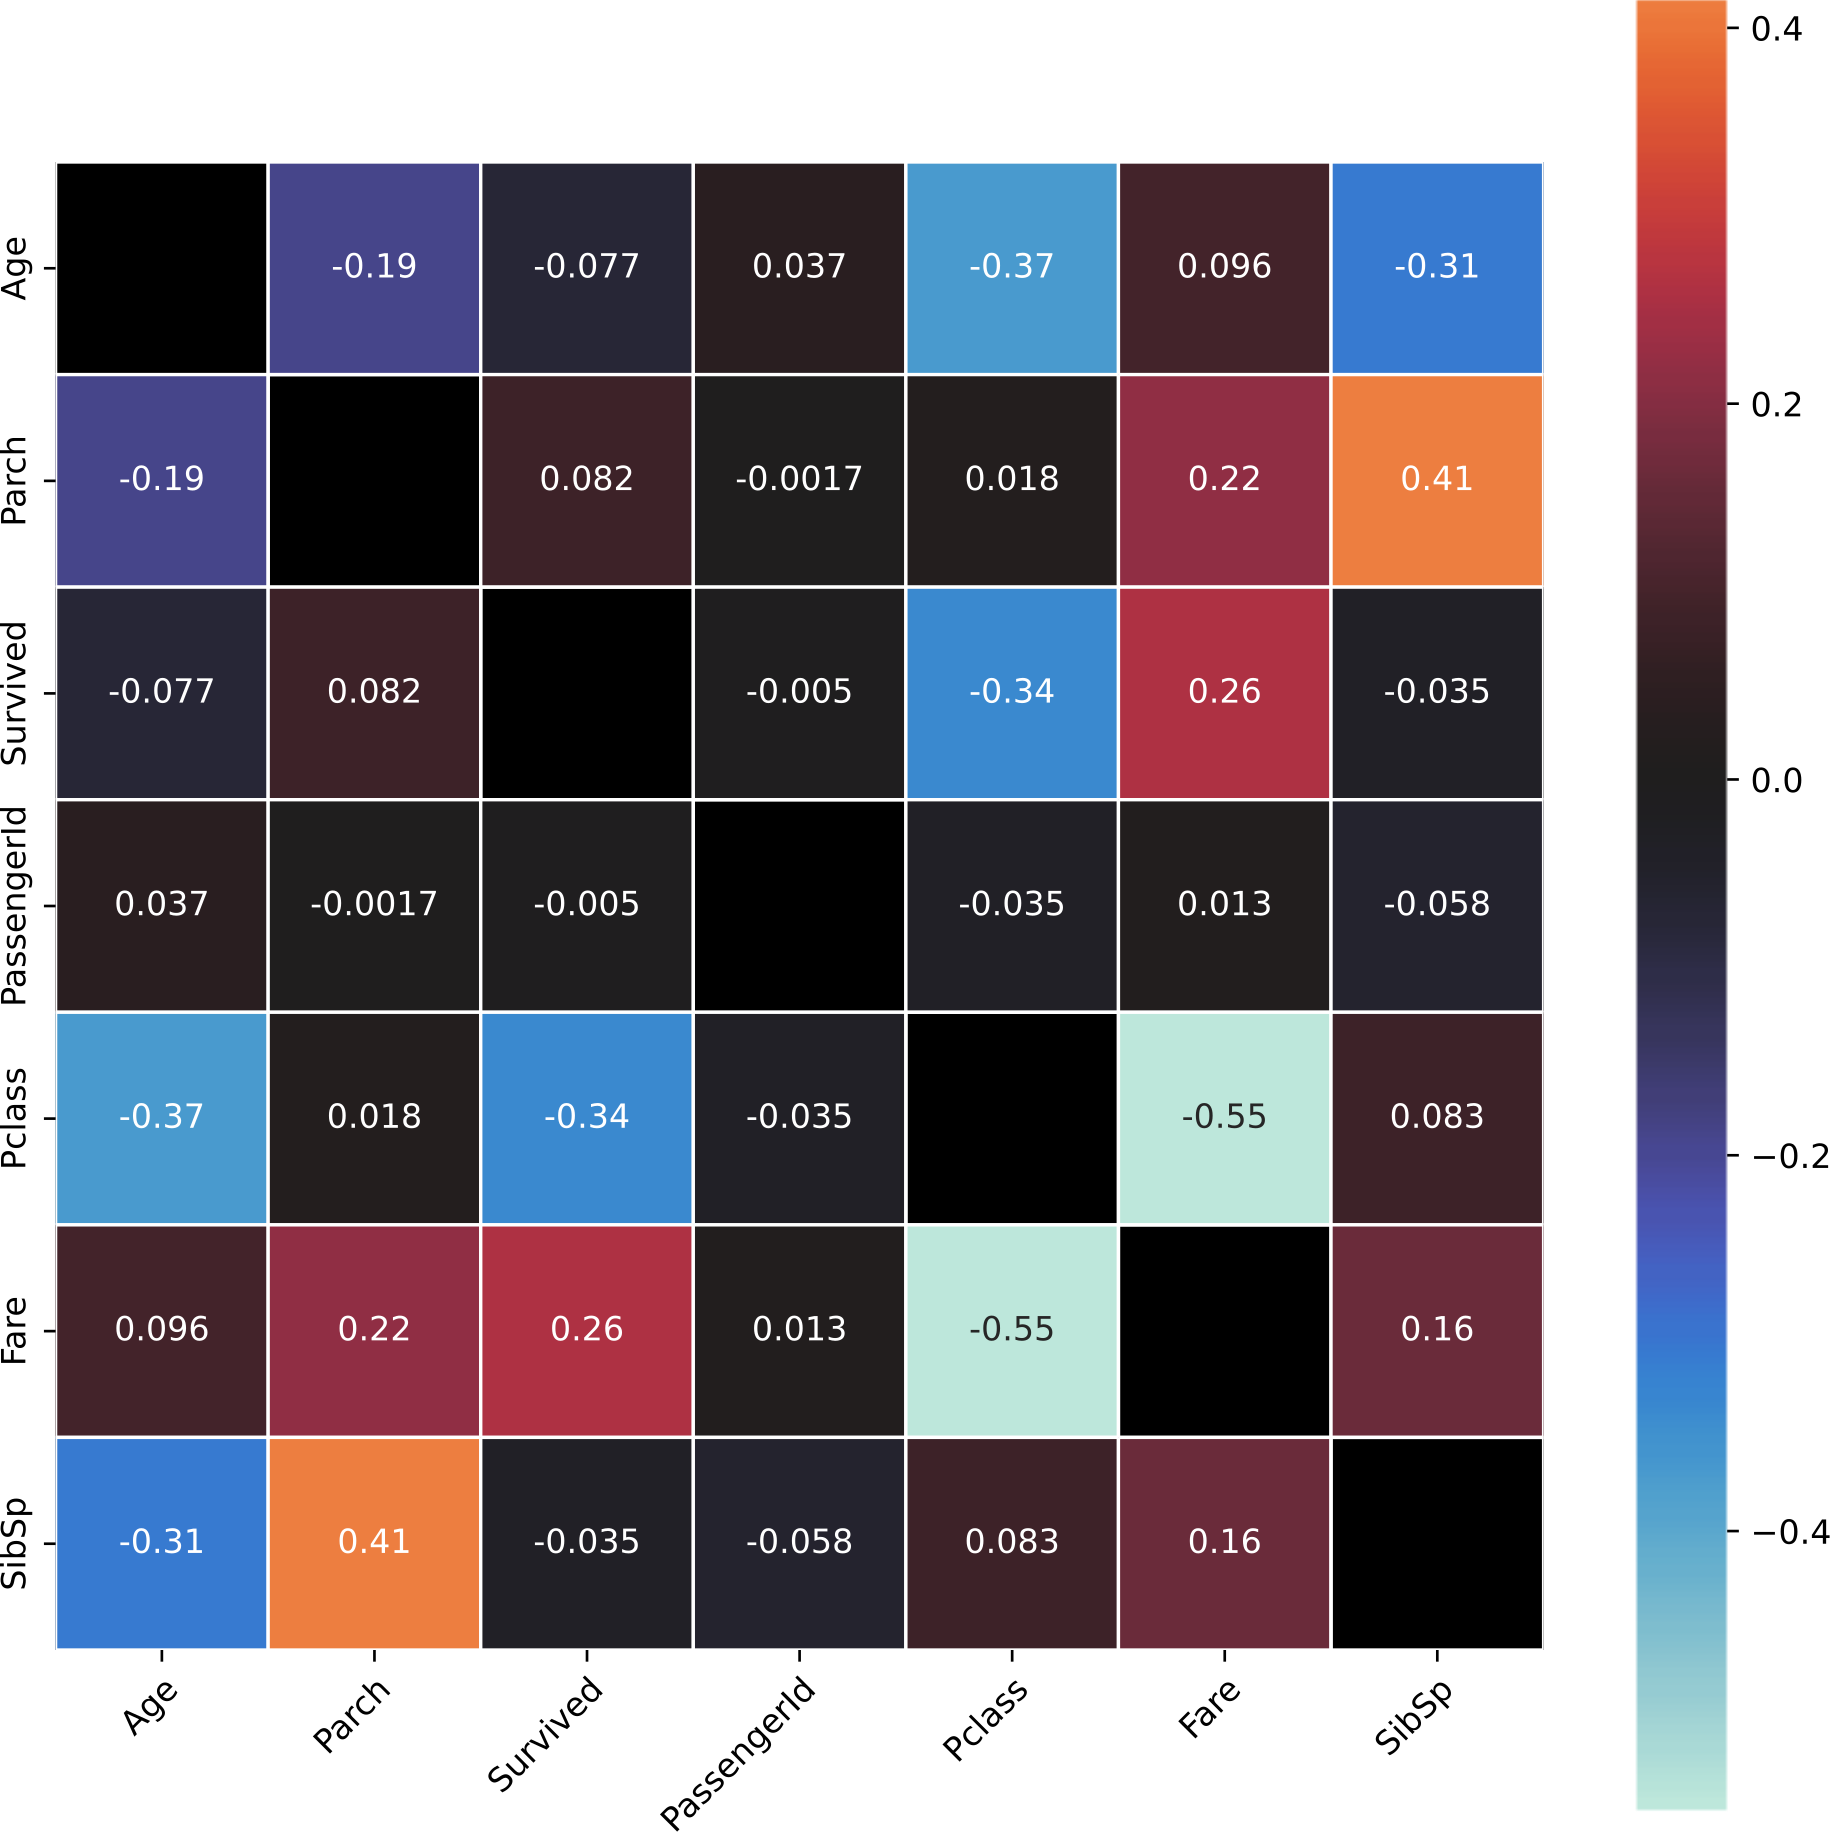

#### The Dummy Variable Trap

Recall that when encoding categorical variables, we usually use the one-hot encoding (also called dummy encoding). This amounts to introducing a separate indicator column for each categorical value and for each sample, assigning the value of 1 to the column corresponding to the actual value of the categorical variable and 0 to all other columns. 

Note, however, that this encoding is redundant in the sense that the last indicator column's value can always be perfectly predicted from the values of the other indicator columns (the value is going to be one exactly when all the other values are zero). But clearly this is going to cause the same problem as when we have a pair of perfectly correlated predictors! This shows us that correlations among sets of different predictors can also break the "no multicollinearity" assumption.

With the one-hot encoding, this situation is often referred to as the "dummy variable trap" and it is easy to resolve – you simply drop the last indicator column.

#### Correlations Among Sets of Variables

As we have seen in the case of the dummy variable trap, correlations among sets of different predictors can also break the "no multicollinearity" assumption, but these are more difficult to rule out than pair-wise correlations. You can try to verify that there are none beforehand, but it is significantly more difficult because in principle you would need to check all possible combinations of predictors to be able to pick up on arbitrary patterns.

There are other ways to diagnose the problem as well, though, e.g. [[detcolin](#detcolin)]:

* Very high standard errors for error coefficients (can be orders of magnitude higher than coefficients themselves);
* The overall model is significant, but none of the coefficients are;
* ...


### The Rest of the Assumptions Are **About Errors** !

Note that only the two above-mentioned assumptions (linearity and the absence of multicollinearity) can be tested **before**  the linear model is fitted. Since the rest of the assumptions are about the residuals (the prediction errors that the model makes), you will, of course, need to fit the model first, compute and only then use them to test the remaining assumptions. **Do not make the mistake of running the following tests on the original data instead of the prediction errors!** 

The residuals can be computed by subtracting the predicted values $\hat y$ from the actual values $y$, i.e. $e = y - \hat y$.

### 3. Independence of Residuals

As we have already said, the condition of independence stipulates that the prediction errors on individual samples should be statistically independent. This assumption cannot be fully verified using data alone – it is also necessary to know how the data was collected, etc. For example, if we have a dataset of 1000 images human-annotated into 10 different classes, we might naturally assume that there is no dependence between errors on individual samples. But what if we found out that the samples were annotated by e.g. 3 different people and each of them interpreted the class names a bit differently? In that case, there will be several distinct groups of samples and the model is bound to have a very different error distribution on each.

#### For Time Series

Time series are a frequent example of a case where errors may not be independent – there can easily be some dependence between errors of subsequent samples. The good thing is that at least this kind of dependence can actually be detected using the data itself – it is commonly done using autocorrelation plots.

The autocorrelation function expresses how much correlation there is between the original signal and its time-lagged versions. The horizontal axis shows the number of time steps by which the signal is lagged, while the vertical axis displays the correlation. Here is an example of a time series that is completely random – each sample drawn independently from a normal distribution.

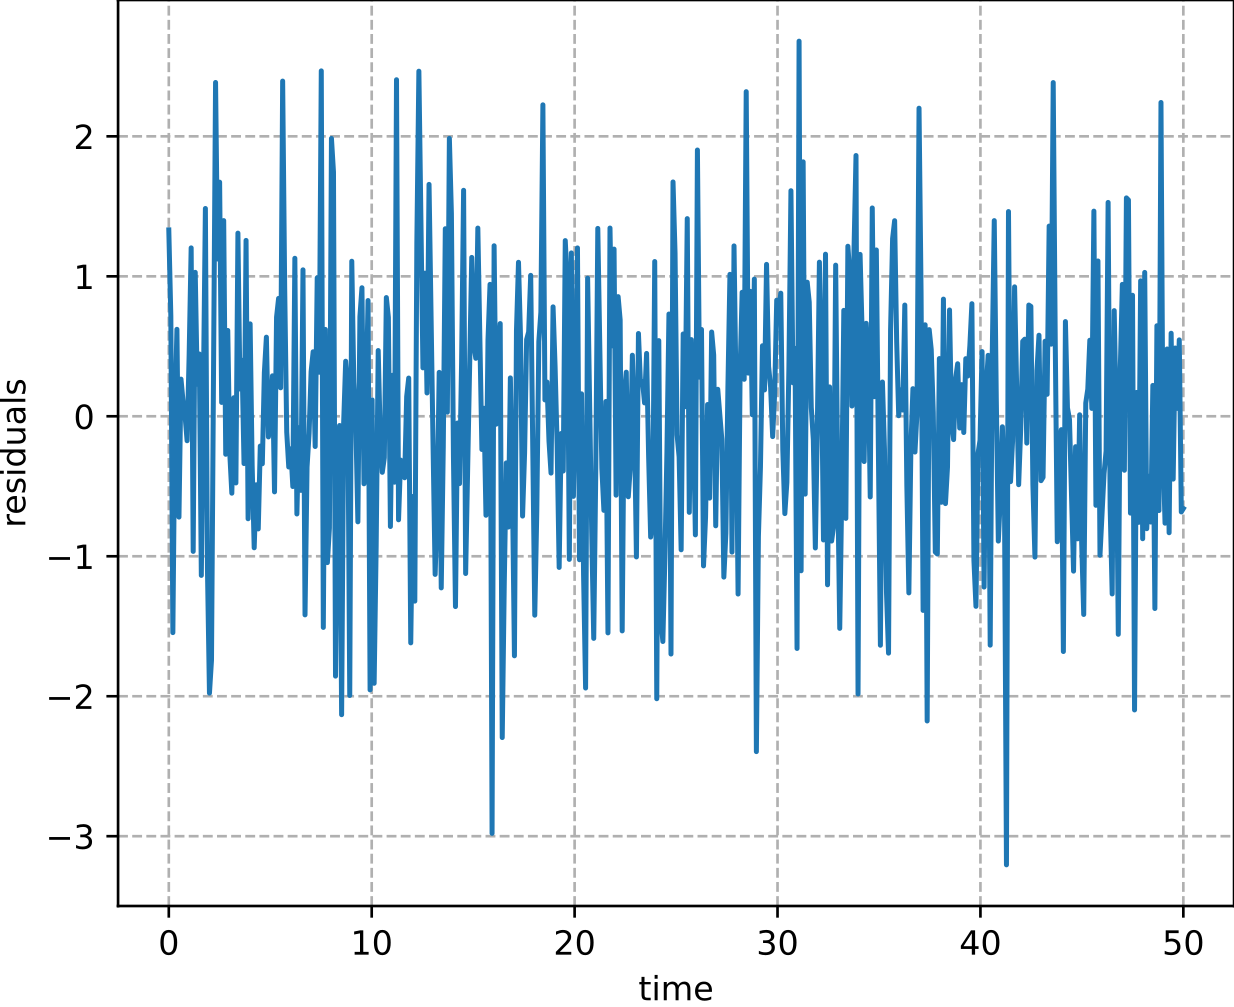

Its autocorrelation plot shows that there is no correlation between the original signal and its time-lagged versions. The only large correlation occurs at the lag of 0 steps: this is because there we are comparing the original signal with itself. Naturally, the correlation is 1 in that case.

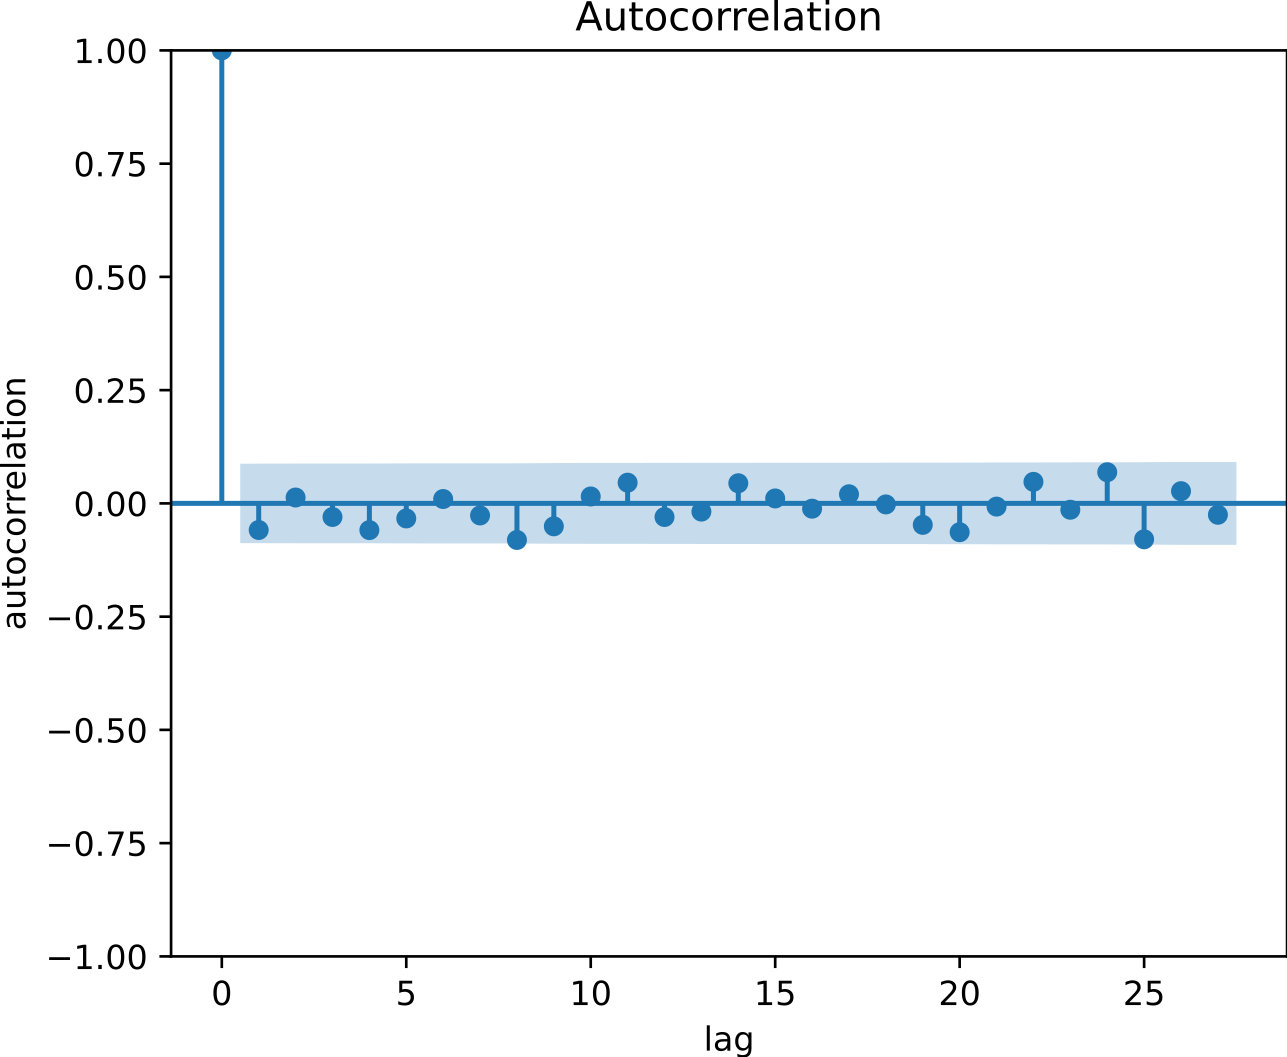

For comparison, if our signal was harmonic (i.e. had periodic components based on sine and cosine waves), there would be clear patterns and repetitions in the signal and thus, there would be some very significant autocorrelations. This is illustrated in the following plots:

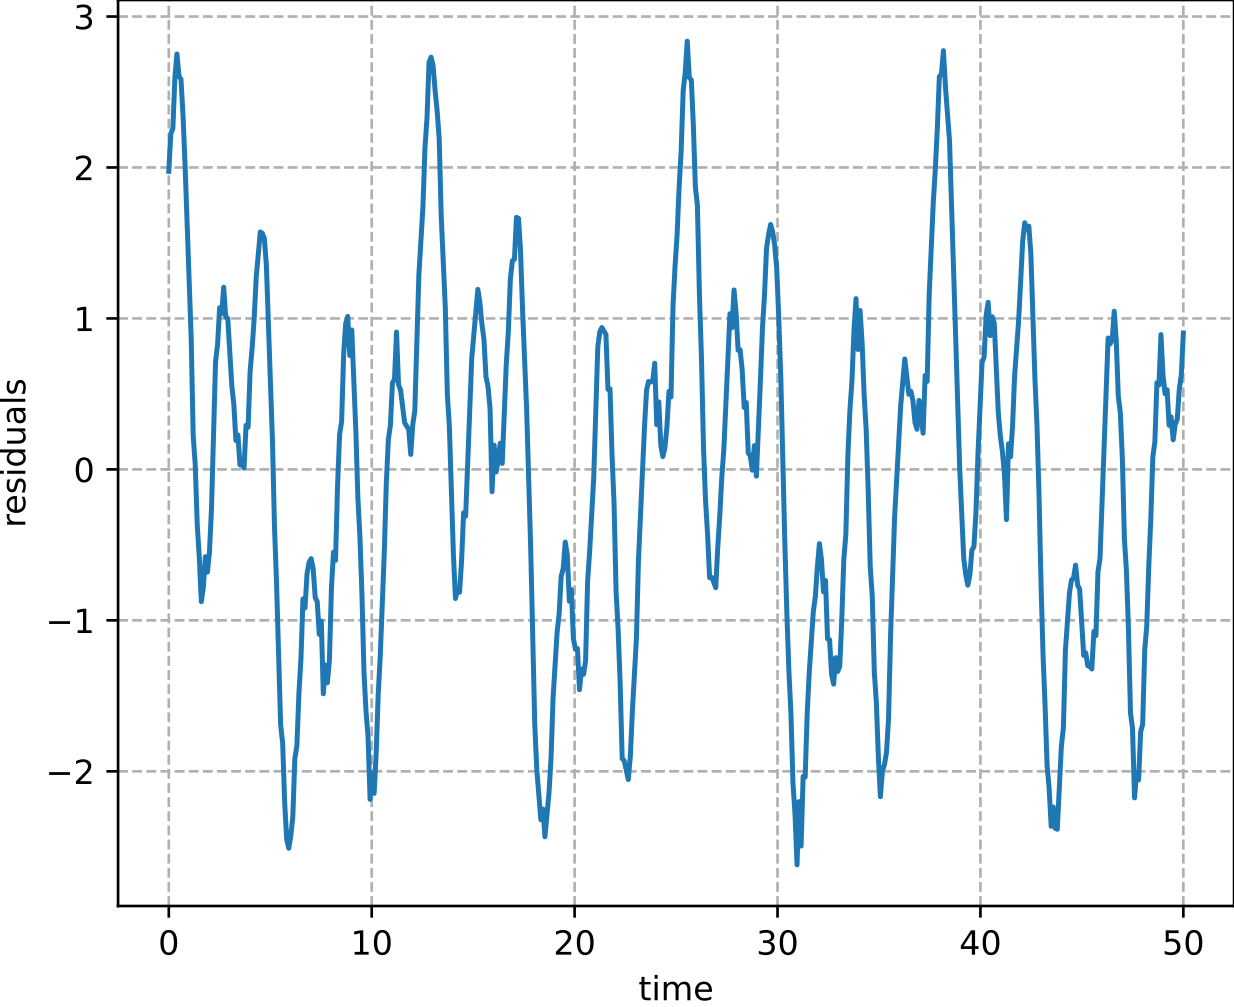

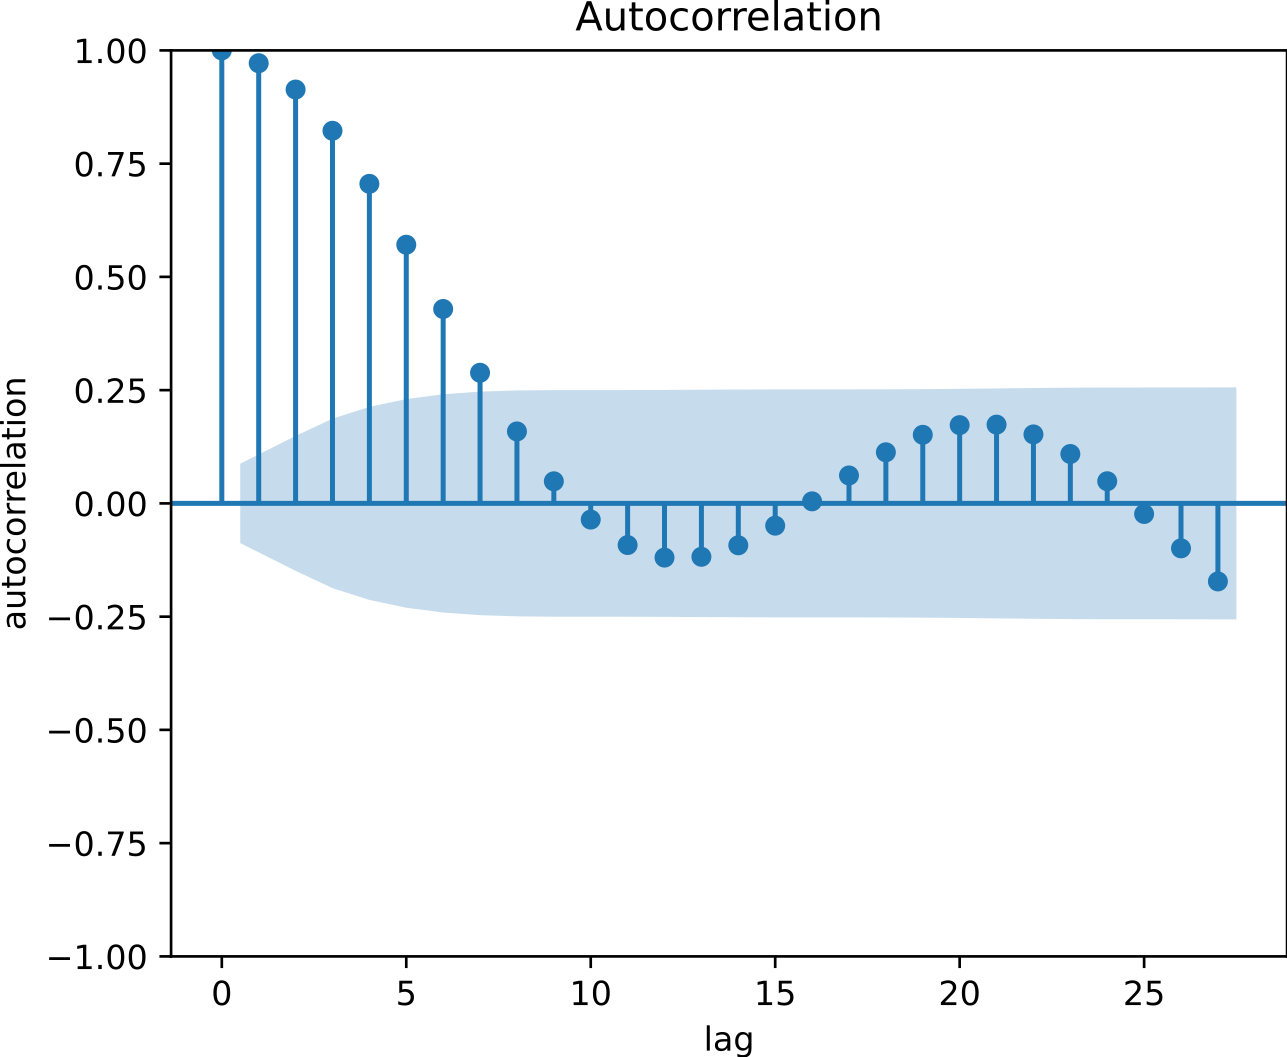

#### Never Apply This Part Mechanically to Just Any Data

Remember that it only makes sense to do this kind of autocorrelation analysis for time series data. On other types of data, of course, unwanted correlations can also exist, but – as we have already said – they are usually not detectable directly using the data. It would be a mistake to think that we can verify independence by drawing an autocorrelation plot for just any kind of data and conclude that the independence condition is met if no strong correlations can be observed in it.



### 4. Homoscedasticity of Residuals

With homoscedasticity, the variance of the residuals is supposed to be constant, i.e. it does not depend on any of the predictors, on time, etc. One way to test this assumption is to plot the residuals ($y - \hat y$) against the predicted values ($\hat y$). Here is an example of homoscedastic residuals:

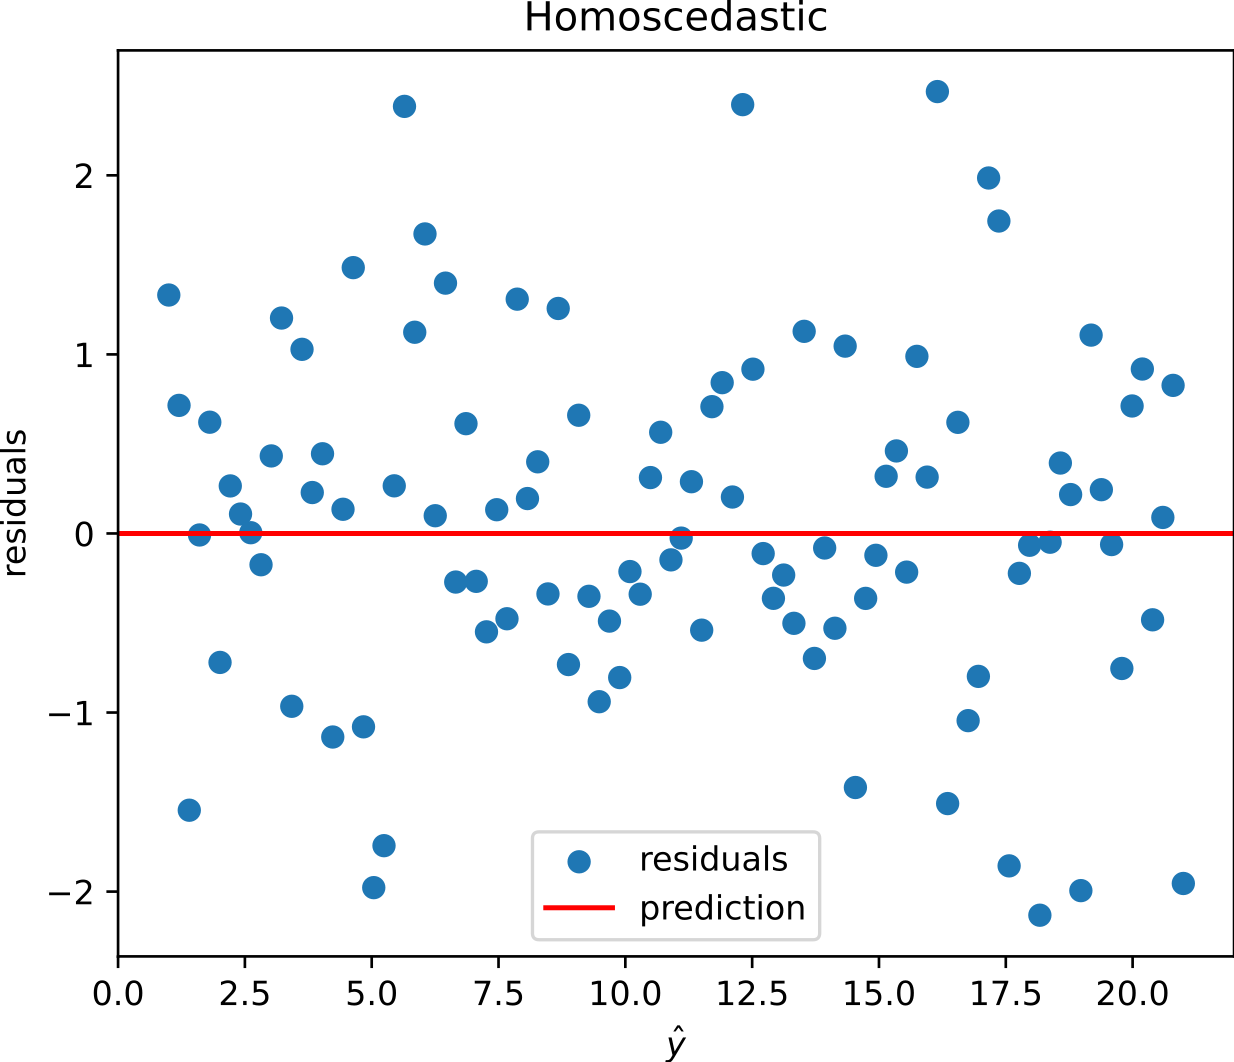

We are also going to show the plot of the original data for comparison:

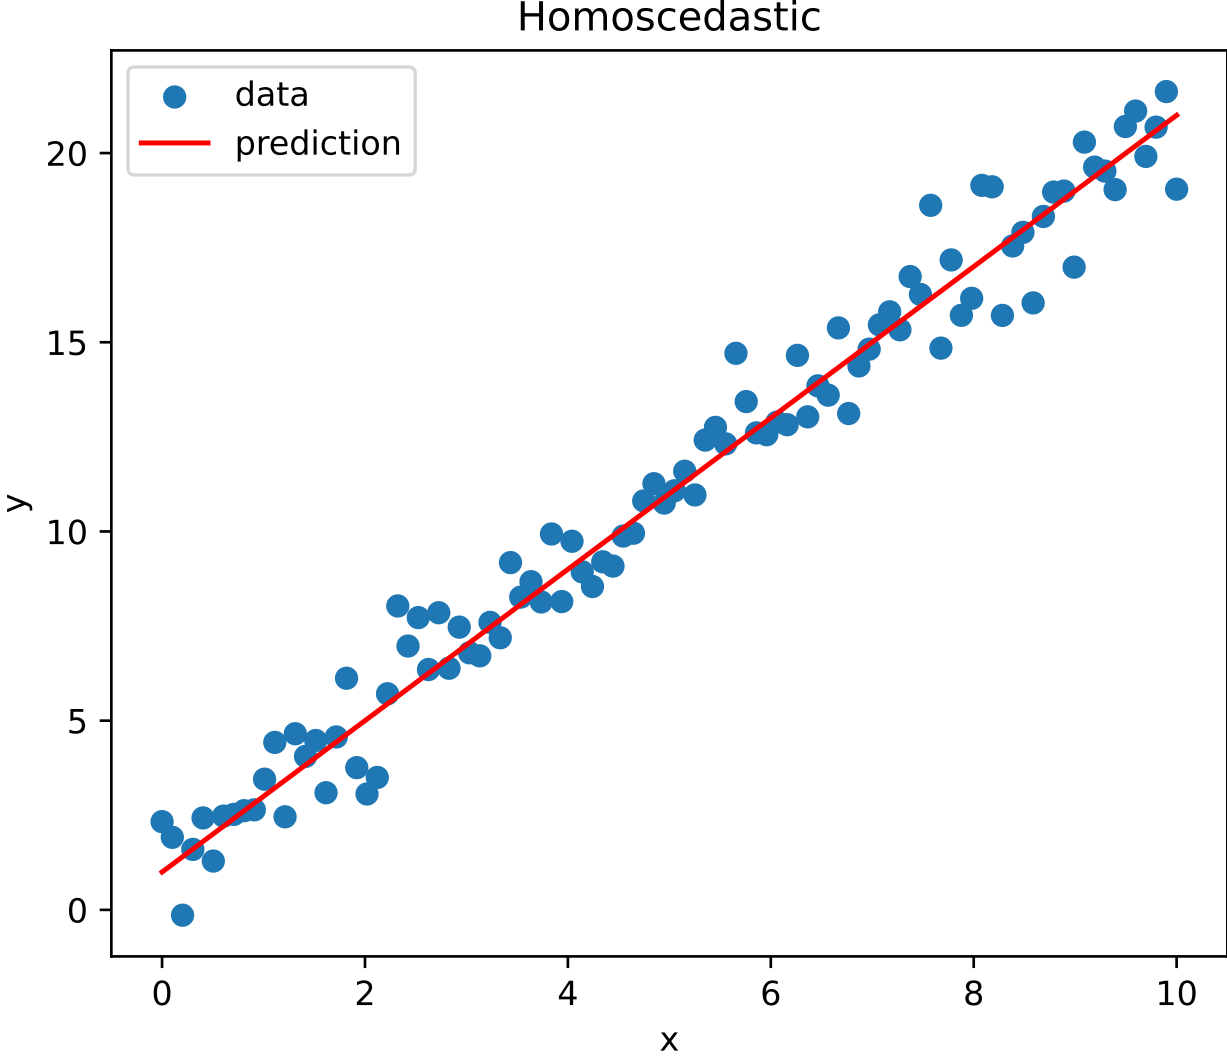

As you can see, the residuals are noisy, but the variance of the noise is constant. For heteroscedastic residuals, that would not be the case – an example is shown below:

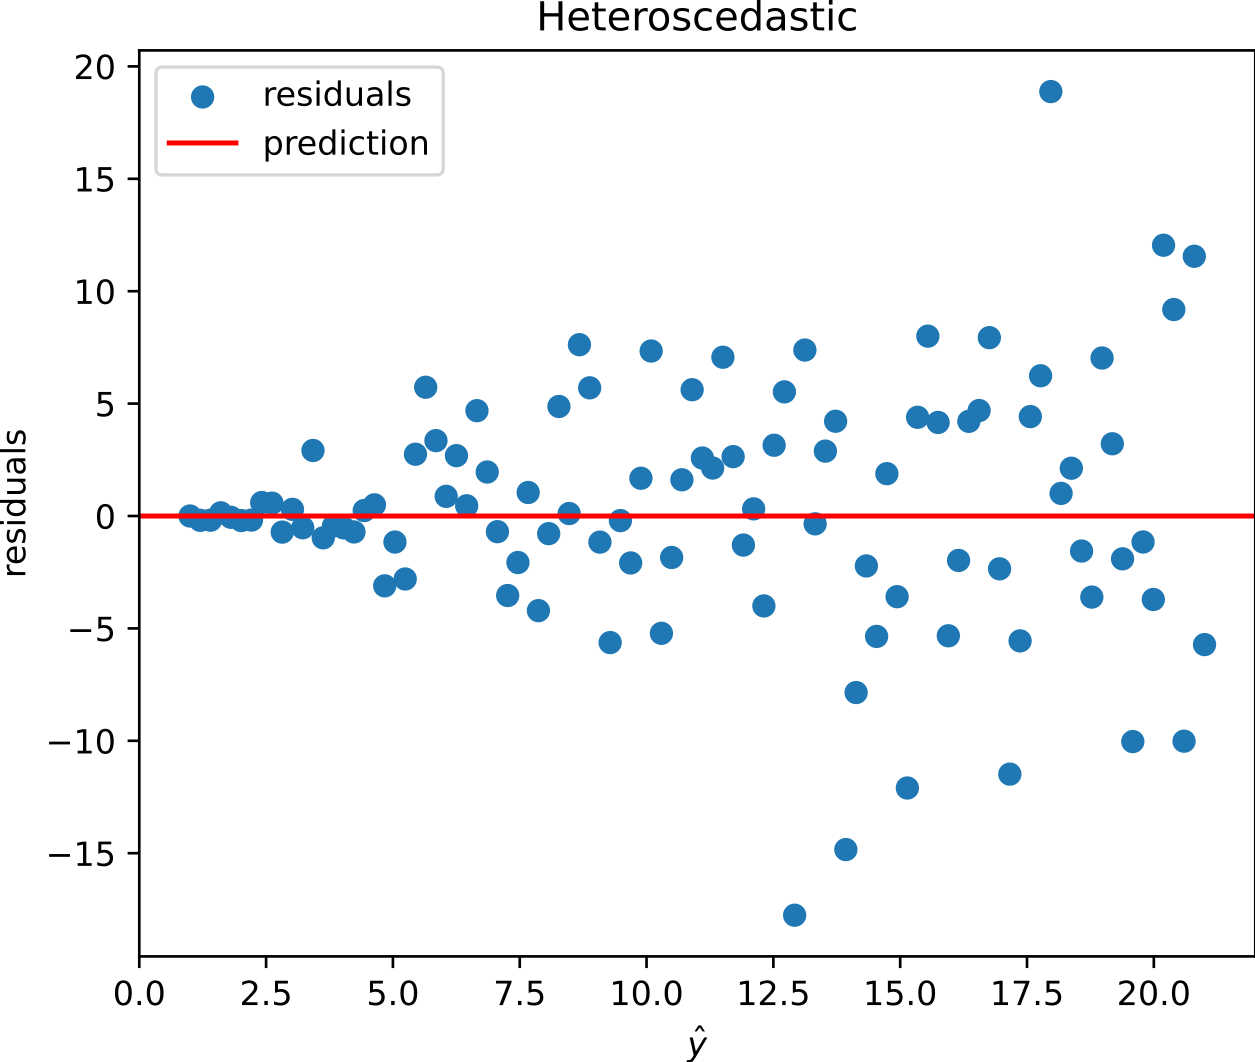

And again, here is the plot of the original data:

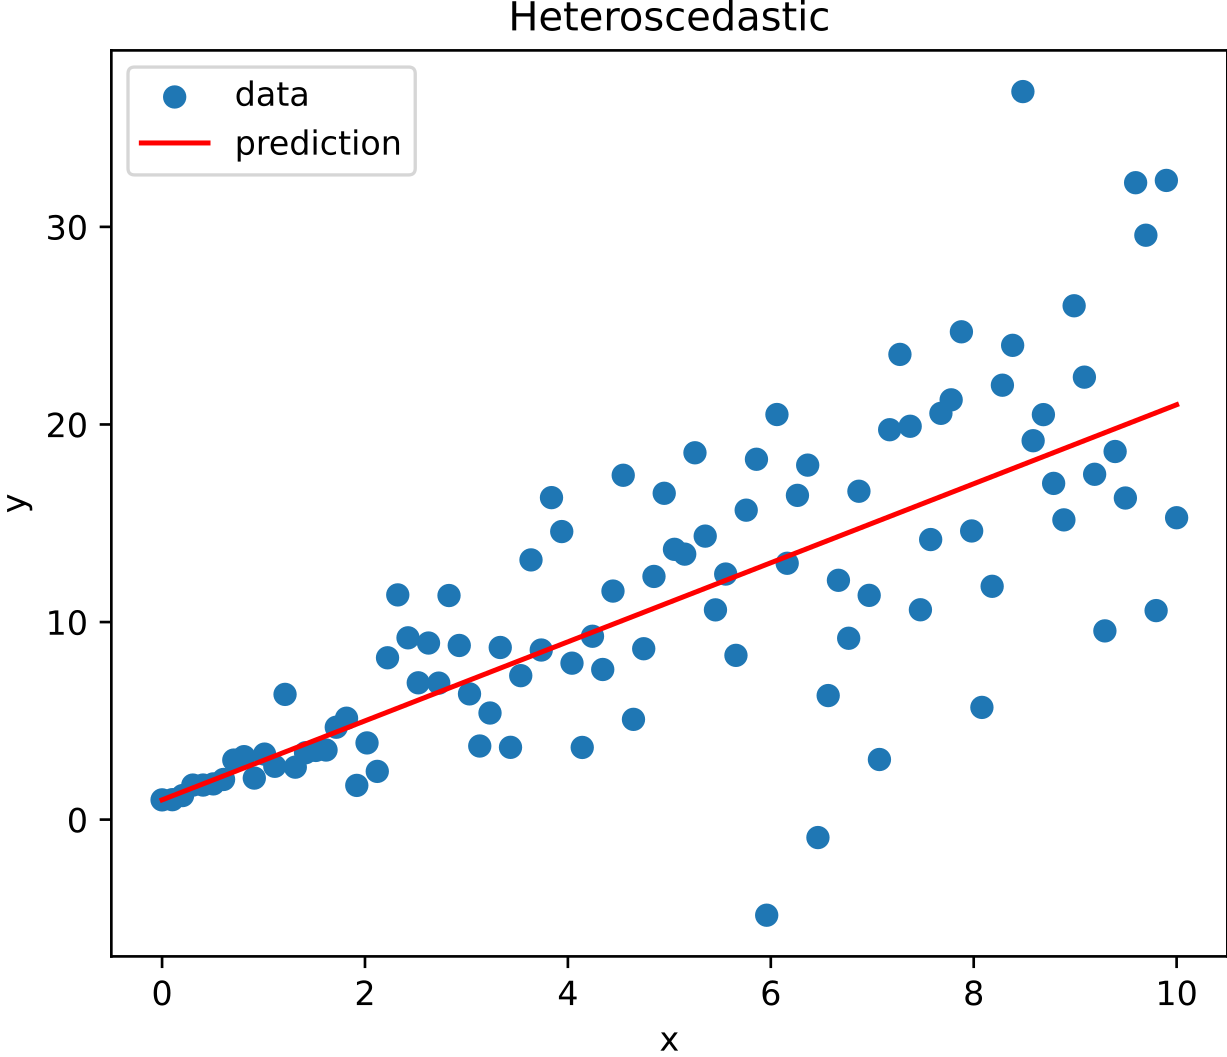



### 5. Normality of Residuals

Finally, we expect the residuals to be normally distributed and their mean to be at zero.

Let's check that for the homoscedastic residuals from the previous example:

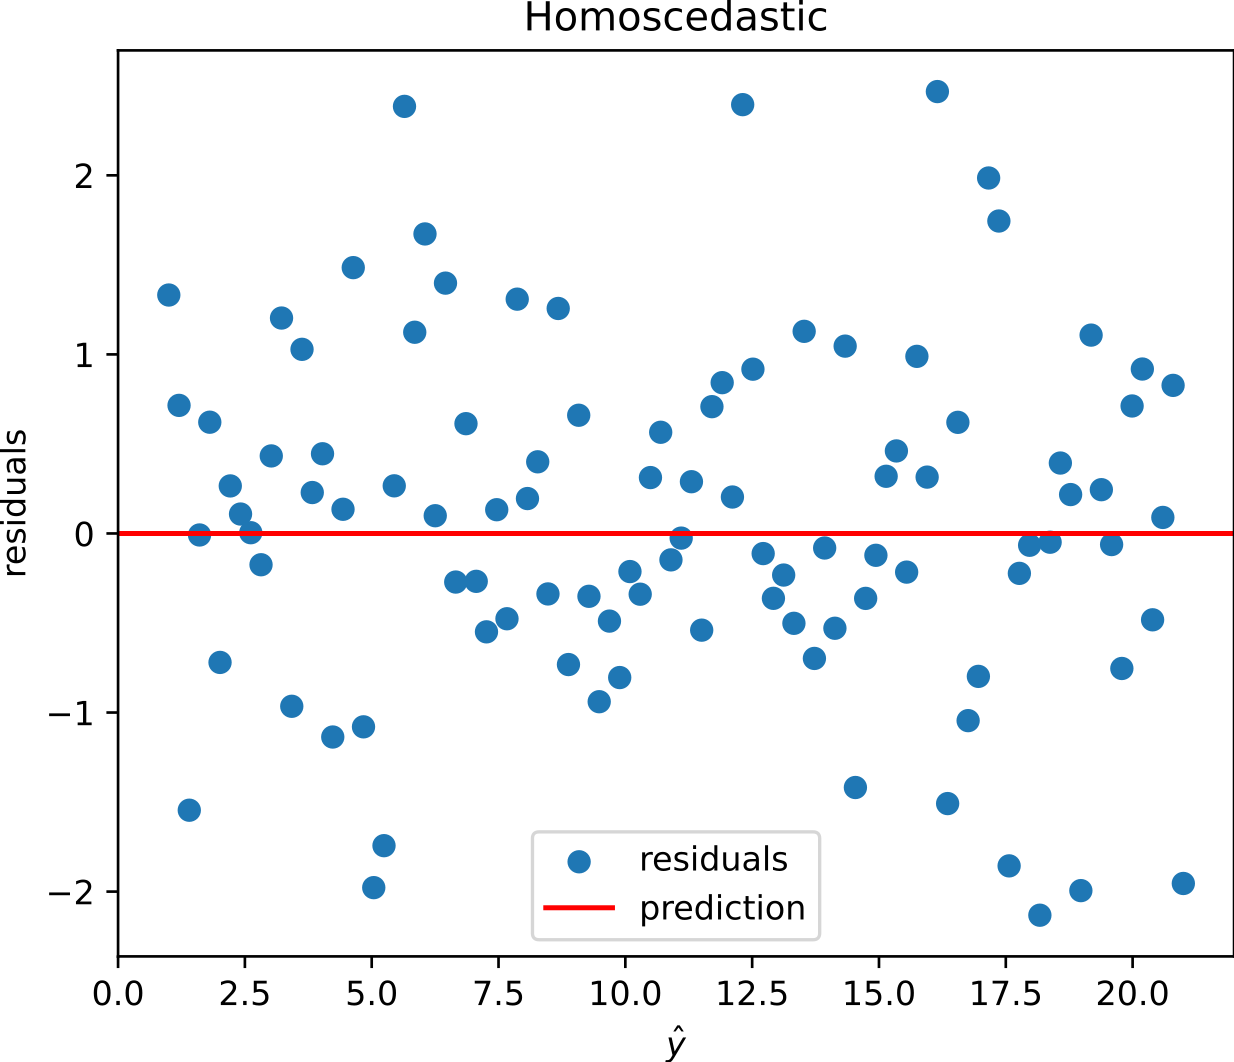

#### The Mean

The mean is, of course, easy to check. In our case, it is 0.08, which is close enough to 0. With more data, it would, of course, be even closer.

#### The Shape

Next we can plot the distribution of the residuals using a histogram overlayed with a KDE (kernel density estimate) plot. For comparison, we will also plot the normal distribution with zero mean and the same standard deviation as the residuals:

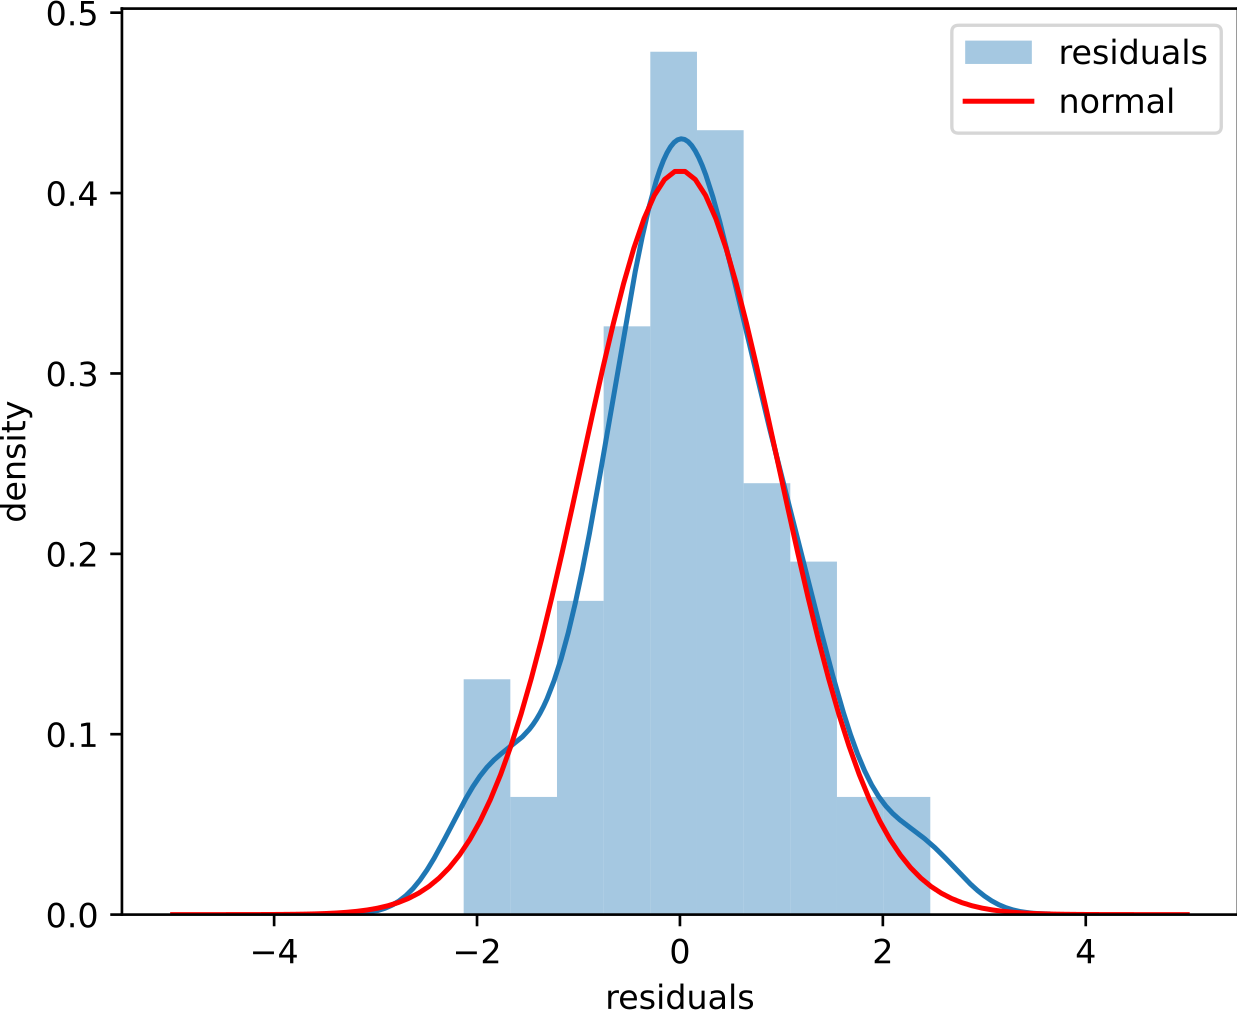

In this case, the distribution is clearly normal.

#### Statistical Tests for Normality

There is also a number of statistical tests that test for normality of a distribution. For instance, there is D'Agostino and Pearson's test, which is implemented in the `scipy.stats.normaltest` function. It returns a p-value that is supposed to be high if the residuals are normally distributed. We would reject the null hypothesis that the residuals are normally distributed if the p-value were below some threshold (e.g. 0.05).

In our case, the p-value is 0.84, which is clearly above the threshold, so we can conclude that the residuals are normally distributed – just like we concluded from the plot.



### References

<a id="duke">[duke]</a> Regression Diagnostics: Testing the Assumptions of Linear Regression. <https://people.duke.edu/~rnau/testing.htm>

<a id="islr">[islr]</a> James, G., Witten, D., Hastie, T. and Tibshirani, R., 2013. An Introduction to Statistical Learning (Vol. 112, p. 18). New York: Springer.

<a id="detcolin">[detcolin]</a> Karen Grace-Martin. Eight Ways to Detect Multicollinearity. URL: <https://www.theanalysisfactor.com/eight-ways-to-detect-multicollinearity/>



### Homoscedasticity



### Normality

